Find a dataset on Data.gov, Ed.Gov, Kaggle, or other sources that is interesting to you and is suitable for regression analysis or a classification model. 

**1. Problem statement. Describe the dataset, analyze the target variable, and state your prediction goal.  5 points**

In [40]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score
, average_precision_score, f1_score, classification_report, accuracy_score
, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

df = pd.read_csv('Financial-Data.csv')
print(df.shape)
df.head(5)

(17908, 21)


,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [41]:
df.loc[df['pay_schedule']=='bi-weekly', 'pay_schedule']= 0
df.loc[df['pay_schedule']=='weekly', 'pay_schedule']= 1
df.loc[df['pay_schedule']=='semi-monthly', 'pay_schedule']= 2
df.loc[df['pay_schedule']=='monthly', 'pay_schedule']= 3
df = df.drop(['months_employed'], axis=1) # this col has a lot of 0s, which will
# complicate prediction in the future steps
df.head(5)

,Entry_id,age,pay_schedule,home_owner,income,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,0,1,3135,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,1,0,3180,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,1,0,1540,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,0,0,5230,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,2,0,3590,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


This is a dataset that shows whether a person has signed to accept a financial loan, along with other financial data points such as their age, income, and whether they own a home. A description of each [desired] columns is as follows:
- entry_id: user identifier
- age
- pay_schedule: how often applicant is paid
- home_owner: 0 = rents, 1 = owns a home
- income
- months_employed: amount of months in current job
- years_employed: amount of years in current job
- current_address: amount of years at current address
- personal_account_m: months applicant held account
- personal_account_y: years applicant held account
- has_debt: 0 = no debt, 1 = has debt
- amount_requested
- risk_score: credit score
- inquiries_last_month: num of inquiries in last month
- e_signed: TARGET; 1 = has signed for the loan, 0 = has NOT signed for the loan

In [42]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entry_id              17908 non-null  int64  
 1   age                   17908 non-null  int64  
 2   pay_schedule          17908 non-null  object 
 3   home_owner            17908 non-null  int64  
 4   income                17908 non-null  int64  
 5   years_employed        17908 non-null  int64  
 6   current_address_year  17908 non-null  int64  
 7   personal_account_m    17908 non-null  int64  
 8   personal_account_y    17908 non-null  int64  
 9   has_debt              17908 non-null  int64  
 10  amount_requested      17908 non-null  int64  
 11  risk_score            17908 non-null  int64  
 12  risk_score_2          17908 non-null  float64
 13  risk_score_3          17908 non-null  float64
 14  risk_score_4          17908 non-null  float64
 15  risk_score_5       

**2. Basic data cleaning.  Drop unwanted features.  Address missing values.  Remove Duplicates. Check if there are any inconsistent inputs for categorical variables. Transform categorical variables into numeric. Use boxplots or histogram to identify outliers for numeric variables and remove them. 20 points**

In [43]:
# data cleaning - drop unwanted features
df = df.rename(columns={'e_signed': 'target'})
df.columns.tolist()

['Entry_id',
 'age',
 'pay_schedule',
 'home_owner',
 'income',
 'years_employed',
 'current_address_year',
 'personal_account_m',
 'personal_account_y',
 'has_debt',
 'amount_requested',
 'risk_score',
 'risk_score_2',
 'risk_score_3',
 'risk_score_4',
 'risk_score_5',
 'ext_quality_score',
 'ext_quality_score_2',
 'inquiries_last_month',
 'target']

In [44]:
df.isnull().sum()

Entry_id                0
age                     0
pay_schedule            0
home_owner              0
income                  0
years_employed          0
current_address_year    0
personal_account_m      0
personal_account_y      0
has_debt                0
amount_requested        0
risk_score              0
risk_score_2            0
risk_score_3            0
risk_score_4            0
risk_score_5            0
ext_quality_score       0
ext_quality_score_2     0
inquiries_last_month    0
target                  0
dtype: int64

In [45]:
print("Before:")
print(df.shape)
df1 = df.drop_duplicates(subset=['Entry_id'], keep='first')
new_df = df1.drop_duplicates(keep=False)
print("After:")
print(new_df.shape)

Before:
(17908, 20)
After:
(17888, 20)


In [46]:
new_df.astype('int32').dtypes

Entry_id                int32
age                     int32
pay_schedule            int32
home_owner              int32
income                  int32
years_employed          int32
current_address_year    int32
personal_account_m      int32
personal_account_y      int32
has_debt                int32
amount_requested        int32
risk_score              int32
risk_score_2            int32
risk_score_3            int32
risk_score_4            int32
risk_score_5            int32
ext_quality_score       int32
ext_quality_score_2     int32
inquiries_last_month    int32
target                  int32
dtype: object

Now we need to remove outliers so that the model is not skewed. 

Within the field of statistics, the IQR (interquartile range) is the "normal" range in which most values of the dataset will occur, with Q1 containing the lower 25% of the data and Q3 containing the remaining 75%. Using these numbers, a min and max are calculated, which are used to determine outliers (values lower than the min and higher than the max). 

A real-world example of this being used is in pediatric doctor appointments, where the doctor will describe a(n) infant or child's growth to be within "x"-percentile, standards to determine if a child has any anomalies in their development (this example just helped me understand how the boxplot relates to other examples than just being a mundane box).

*Drop outliers method explanation from [source](https://stackoverflow.com/questions/35827863/remove-outliers-in-pandas-dataframe-using-percentiles)

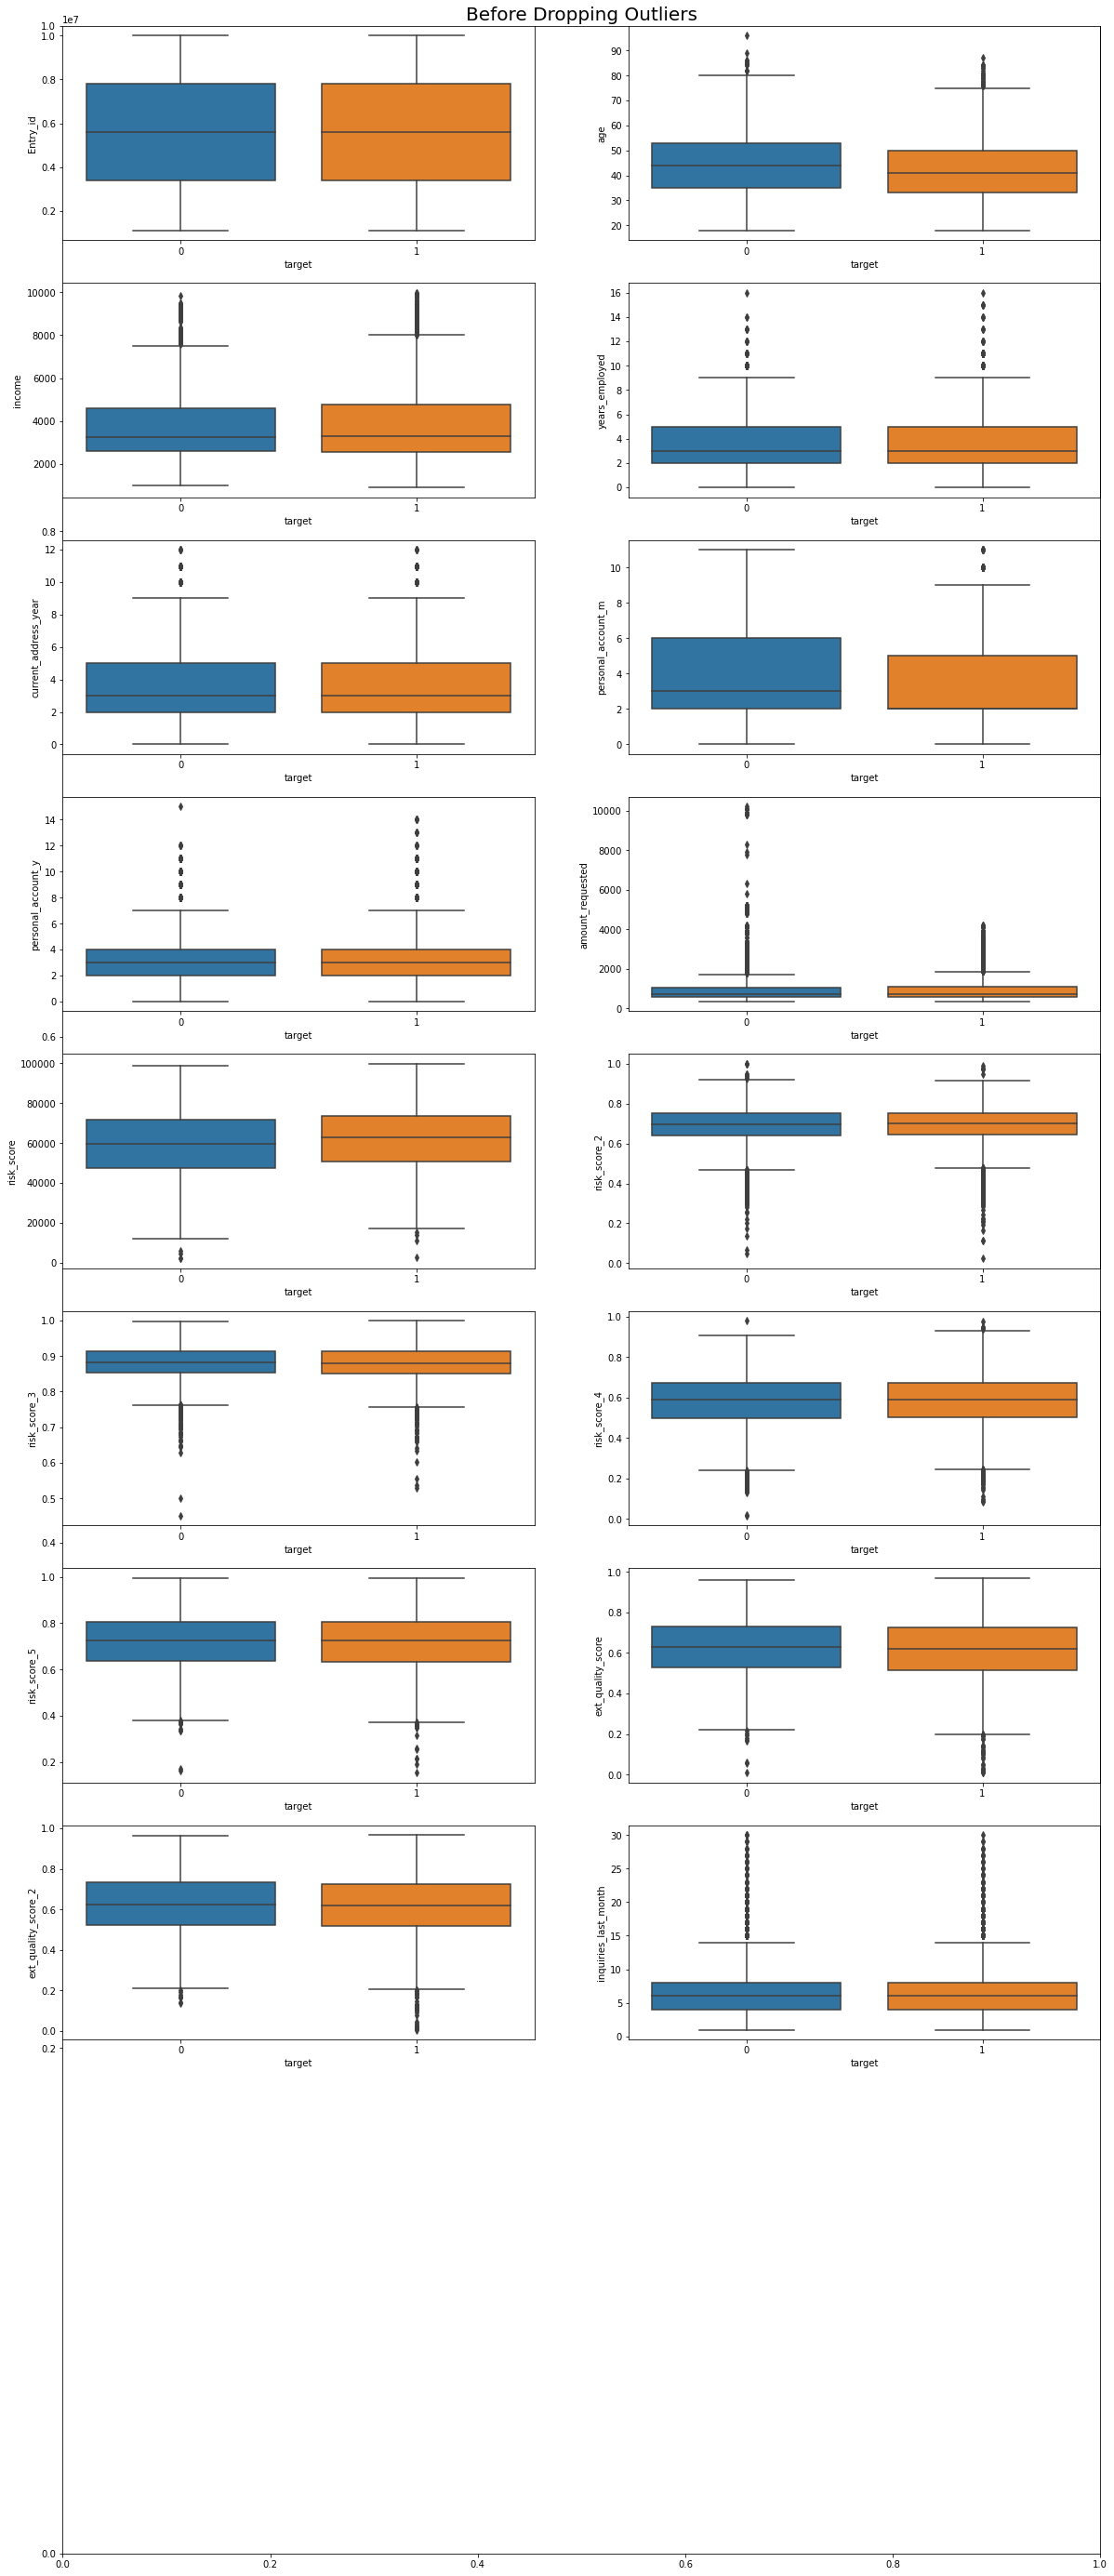

In [54]:
# drop outliers for numerical variables
import seaborn as sns

status = "Before"
def createBoxplots(df):
    cols = ['Entry_id', 'age', 'income', 'years_employed', 
       'current_address_year', 'personal_account_m', 'personal_account_y', 
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3', 
       'risk_score_4', 'risk_score_5', 'ext_quality_score', 'ext_quality_score_2', 
       'inquiries_last_month']
    fig = plt.figure(figsize=(20, 50))
    plt.title(status + " Dropping Outliers", fontsize=20)

    for i in range(len(cols)):
        column=cols[i]
        sub=fig.add_subplot(10, 2, i+1)
        sns.boxplot(x='target', y=column, data=df)

createBoxplots(new_df)

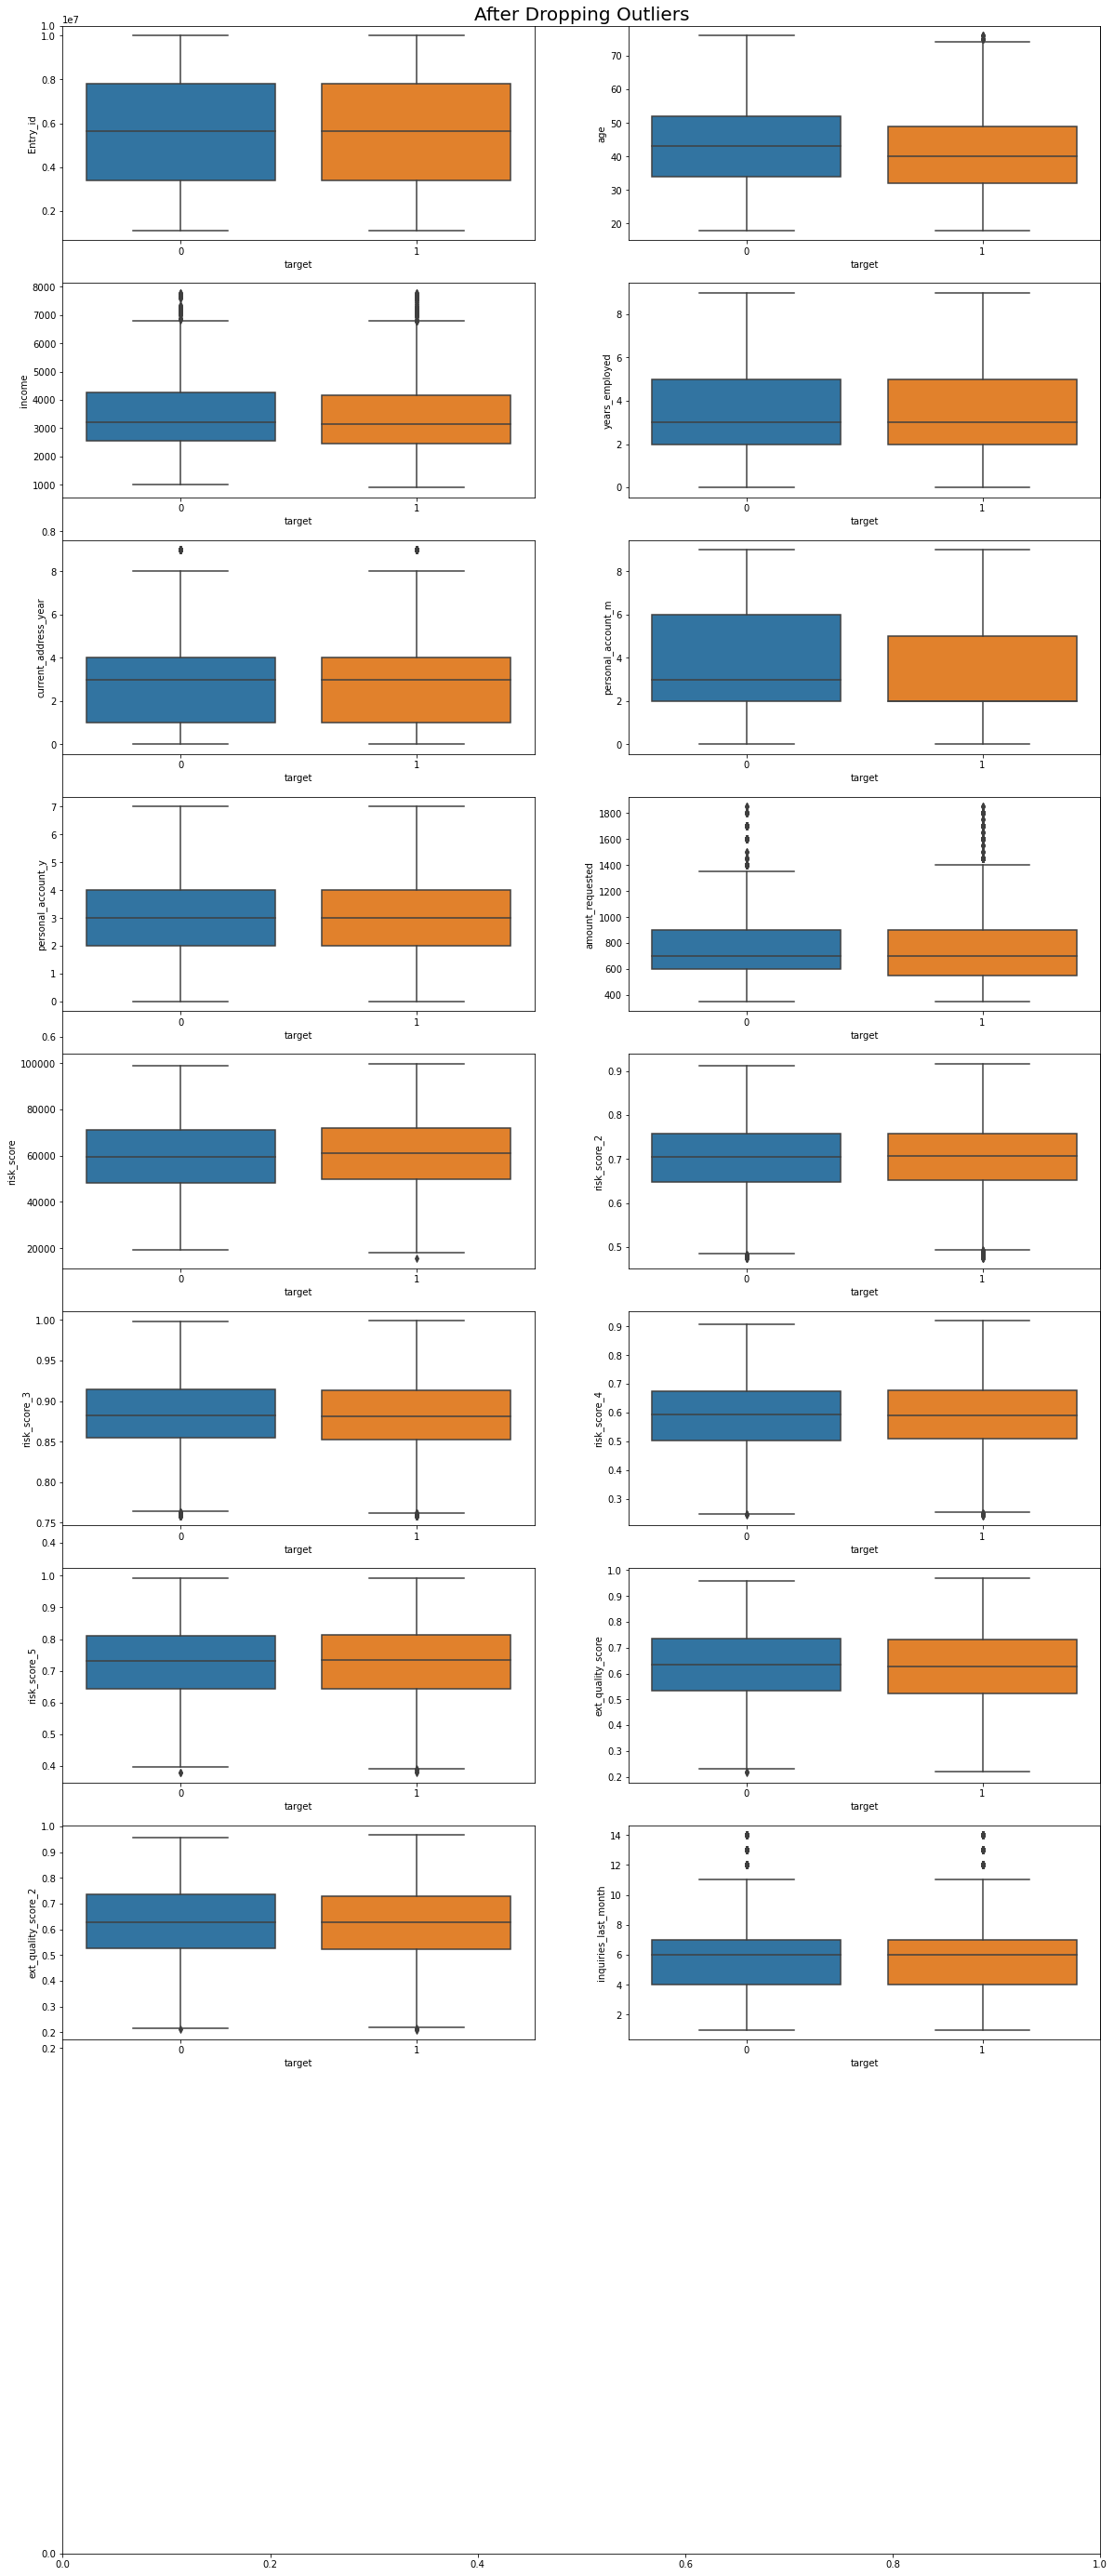

In [65]:
# drop numerical outliers
# calculate the upper and lower bounds for each column, then drop the outliers based on each column's
# interquartile range
cols = ['Entry_id', 'age', 'income', 'years_employed', 
       'current_address_year', 'personal_account_m', 'personal_account_y', 
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3', 
       'risk_score_4', 'risk_score_5', 'ext_quality_score', 'ext_quality_score_2', 
       'inquiries_last_month']
Q1 = new_df[cols].quantile(0.25)
Q3 = new_df[cols].quantile(0.75)
IQR = Q3 - Q1

final_df = new_df[~((new_df[cols] < (Q1 - 1.5 * IQR)) |(new_df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
# show the boxplots after dropping outliers
createBoxplots(final_df)

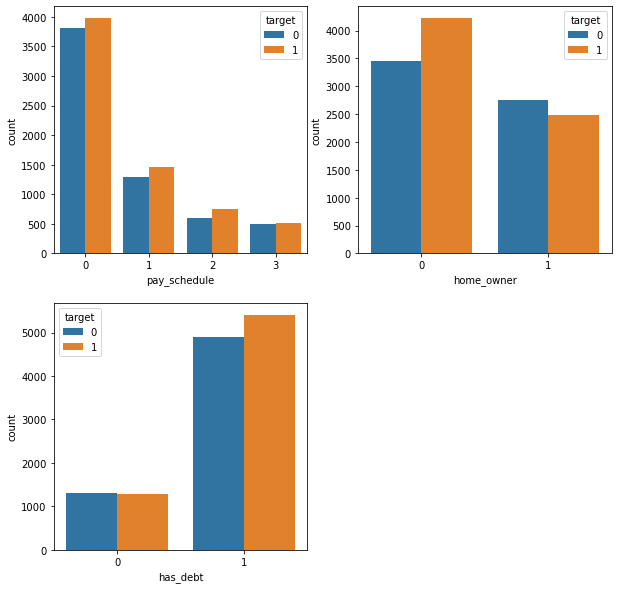

In [66]:
# categorical: true/false (1/0)
# the categorical variables do not have numerical outliers, therefore cutting values is not needed
# we can go straight to determining if the categorical variables are relevant or not
cat_df = final_df[['pay_schedule', 'home_owner', 'has_debt', 'target']].copy()
cols = ['pay_schedule', 'home_owner', 'has_debt']
fig = plt.figure(figsize=(10, 10))
for i in range(len(cols)):
    columns=cols[i]
    sub=fig.add_subplot(2, 2, i+1)
    sns.countplot(x=columns, hue='target', data=cat_df)
# for the cat. features, we see quite a significance between them and the target

**Feature Engineering. 20 points**

Feature selection. Use graphs, ANOVA test, Chi-squared test to reduce the dimension. Any variables with zero to little variance?  Any features Irrelevant to the target variable? Any high-correlated Features? 

In [67]:
# ANOVA
# use for numerical data
from sklearn.feature_selection import SelectKBest, f_classif
columns = ['age', 'income', 'current_address_year', 'personal_account_m', 'amount_requested', 'ext_quality_score_2']

x = new_df.loc[:, columns]
y = new_df.loc[:, 'target']

fs = SelectKBest(score_func=f_classif, k='all')
FeaturesS = fs.fit(x, y)
np.set_printoptions(suppress = True)

print("F-Scores:")
for x,y in zip(FeaturesS.scores_, columns): # print f score for each col and the col name
    print(x, y, '\n')
print('\n')

print("P-Values:")
for a,b in zip(FeaturesS.pvalues_, columns): # print f score for each col and the col name
    print(a, b, '\n')

F-Scores:
170.1891519339064 age 

17.658341388629665 income 

6.389797828887694 current_address_year 

118.9369358202698 personal_account_m 

86.16053407512335 amount_requested 

10.82218998030785 ext_quality_score_2 



P-Values:
1.0106943024163286e-38 age 

2.6563577991692407e-05 income 

0.011486346505702376 current_address_year 

1.3206928792420239e-27 personal_account_m 

1.844247407369736e-20 amount_requested 

0.0010048464016983172 ext_quality_score_2 



*note: numbers that are (x)e-(y) is a really small number when converted to scientific notation*
- **Features w/ high F-score**: age, personal_account_m, income, amount_requested
- **Features w/ low F-score**: current_address_year, amount_requested, ext_quality_score_2

- **Features w/ high p-value (x > 0.05)**: amount_requested, ext_quality_score_2
- **Features w/ low p-value ( x <= 0.05)**: age, income, current_address_year, personal_account_m, amount_requested

- After evaluating these, it is decided that features to drop are: current_address_year, ext_quality_score_2

In [68]:
# do chi squared test for cat. vars.
cols = ['pay_schedule', 'home_owner', 'has_debt']
x = new_df.loc[:, cols]
y = new_df.loc[:, 'target']

chi = SelectKBest(score_func=chi2, k='all')
catFeatures = chi.fit(x, y)

print("Chi-Squared Scores:")
for x,y in zip(catFeatures.scores_, cols):
    print(x, y, '\n')
print('\n')

print("P-Values:")
for a,b in zip(catFeatures.pvalues_, cols):
    print(a, b, '\n')

Chi-Squared Scores:
12.5205471431942 pay_schedule 

23.06042370266627 home_owner 

5.548236848279965 has_debt 



P-Values:
0.0004025010033228385 pay_schedule 

1.5698906985997376e-06 home_owner 

0.018499312635950234 has_debt 



- **Features w/ low Chi-squared**: has_debt
- **Features w/ high Chi-squared**: pay_schedule, home_owner

- **Features w/ high p-value (x > 0.05)**: has_debt
- **Features w/ low p-value (x <= 0.05)**: pay_schedule, home_owner

- After evaluation, it is decided that features to drop are: has_debt

In [70]:
drop = ['current_address_year', 'ext_quality_score_2', 'has_debt'] # these have a low f-score or chi-squared
# score, with a high p-value, showing that they do not correlate to the target as well as the other
# variables do
data = new_df.drop(drop, axis=1)
data.columns.tolist()
# explain justification for dropping

['Entry_id',
 'age',
 'pay_schedule',
 'home_owner',
 'income',
 'years_employed',
 'personal_account_m',
 'personal_account_y',
 'amount_requested',
 'risk_score',
 'risk_score_2',
 'risk_score_3',
 'risk_score_4',
 'risk_score_5',
 'ext_quality_score',
 'inquiries_last_month',
 'target']

In [73]:
print(data.corr().sort_values(by='target', ascending=True))
# highest correlated to target: risk_score
# highest correlated to income: amount_requested

                      Entry_id       age  home_owner    income  \
age                   0.004258  1.000000    0.141873  0.174043   
personal_account_m   -0.000649 -0.013725    0.013705  0.009309   
home_owner            0.002401  0.141873    1.000000  0.147333   
risk_score_3         -0.005121  0.111350    0.049949  0.059127   
ext_quality_score     0.006250  0.032041    0.010143 -0.008399   
inquiries_last_month -0.003509  0.041350    0.010830  0.051878   
personal_account_y   -0.007945  0.040885   -0.047650 -0.002075   
risk_score_5          0.005415  0.093819   -0.080261  0.025527   
Entry_id              1.000000  0.004258    0.002401 -0.008923   
years_employed       -0.000937  0.182450    0.027055  0.102100   
risk_score_4          0.006930  0.069118   -0.137196 -0.001198   
risk_score_2          0.013484 -0.019401    0.000582 -0.023631   
income               -0.008923  0.174043    0.147333  1.000000   
amount_requested      0.001990  0.084386    0.034171  0.289273   
risk_score

**Feature scaling. Does this algorithm require normalized data or standardized data?
Are there any categorical variables need to be changed to dummy variables?**

At its original state, the pay_schedule feature needed to be changed to a dummy variable in order to continue with the evaluation, as it contained string values. It does not appear that the dataframe needs normalization, as shifting the data between 0 and 1 would not help the prediction. Standardization is also not necessary, since the data does not follow a normal Gaussian distribution. 

**Build the prediction model. 20 points**
Does this data need to be balanced?
Do you use train_test_split or cross validation to validate the result?
Which algorithm is appropriate for this problem?
Which metrics do you use to evaluate the prediction model?

In [74]:
# Next, we must check if the data needs to be balanced. We check this by seeing if there is 
# a significant difference between positive and negative target cases.
print("Negative cases - did not sign for the loan:")
print((data['target'] == 0).sum())
print('\n')
print("Positive cases - did sign for the loan:")
print((data['target'] == 1).sum())

# it appears that this data does not need balancing, as the margins are slim

Negative cases - did not sign for the loan:
8259


Positive cases - did sign for the loan:
9629


Evaluate the data to choose an algorithm:

- K-nearest neighbor: finds correlation using nearest nieghbor to the target; not ideal for categorical data
- Linear Regression: relationship between one dependent variable and one or more explanatory/independent variables
- Logistic Regression: estimates the probability of an event occurring; dependent variable must be binary; independent vars must be independent of each other
- Decision Tree: used for more complex, "layered" categories; vars may or may not be dependent


The data does not require normalization, as the dataframe is large, with over 17,000 entries - the entries consist of different cases for each feature and the target. The margin between positive and negative cases appear to be very slim. 

We will use logistic regression algorithm for this dataset, since we are predicting the probability that someone will sign for a loan, with the target being a binary outcome of 'yes' or 'no', essentially. The model will then be evaluated using the f1 score since the target is binary.

In [75]:
# build the logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)

In [77]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score
# evaluate the model using cross validation w/ 10-fold. This increases randomization, as our dataset 
# is quite large

x = data.loc[:, ['risk_score', 'amount_requested']]
y = data.loc[:, 'target']

cv_scores = cross_val_score(model, x, y, cv=10, scoring='f1') # calculate the f1 scores through cross validation to evaluate the model's
# ability to predict. This is an evaluation that factors in the accuracy and recall
print("Avg cross-validation score: " + str(cv_scores.mean())) # find the overall f1

Avg cross-validation score: 0.6998582624192778
